Sebastián Arango Crispín - 201921816

# Taller 3 - Modelos de Aprendizaje en Python

## Análisis exploratorio

In [3]:
import pandas as pd
data = pd.read_csv('real_estate_valuation_data_set.csv', index_col=0)
data.shape
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Estadísticas descriptivas

In [6]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


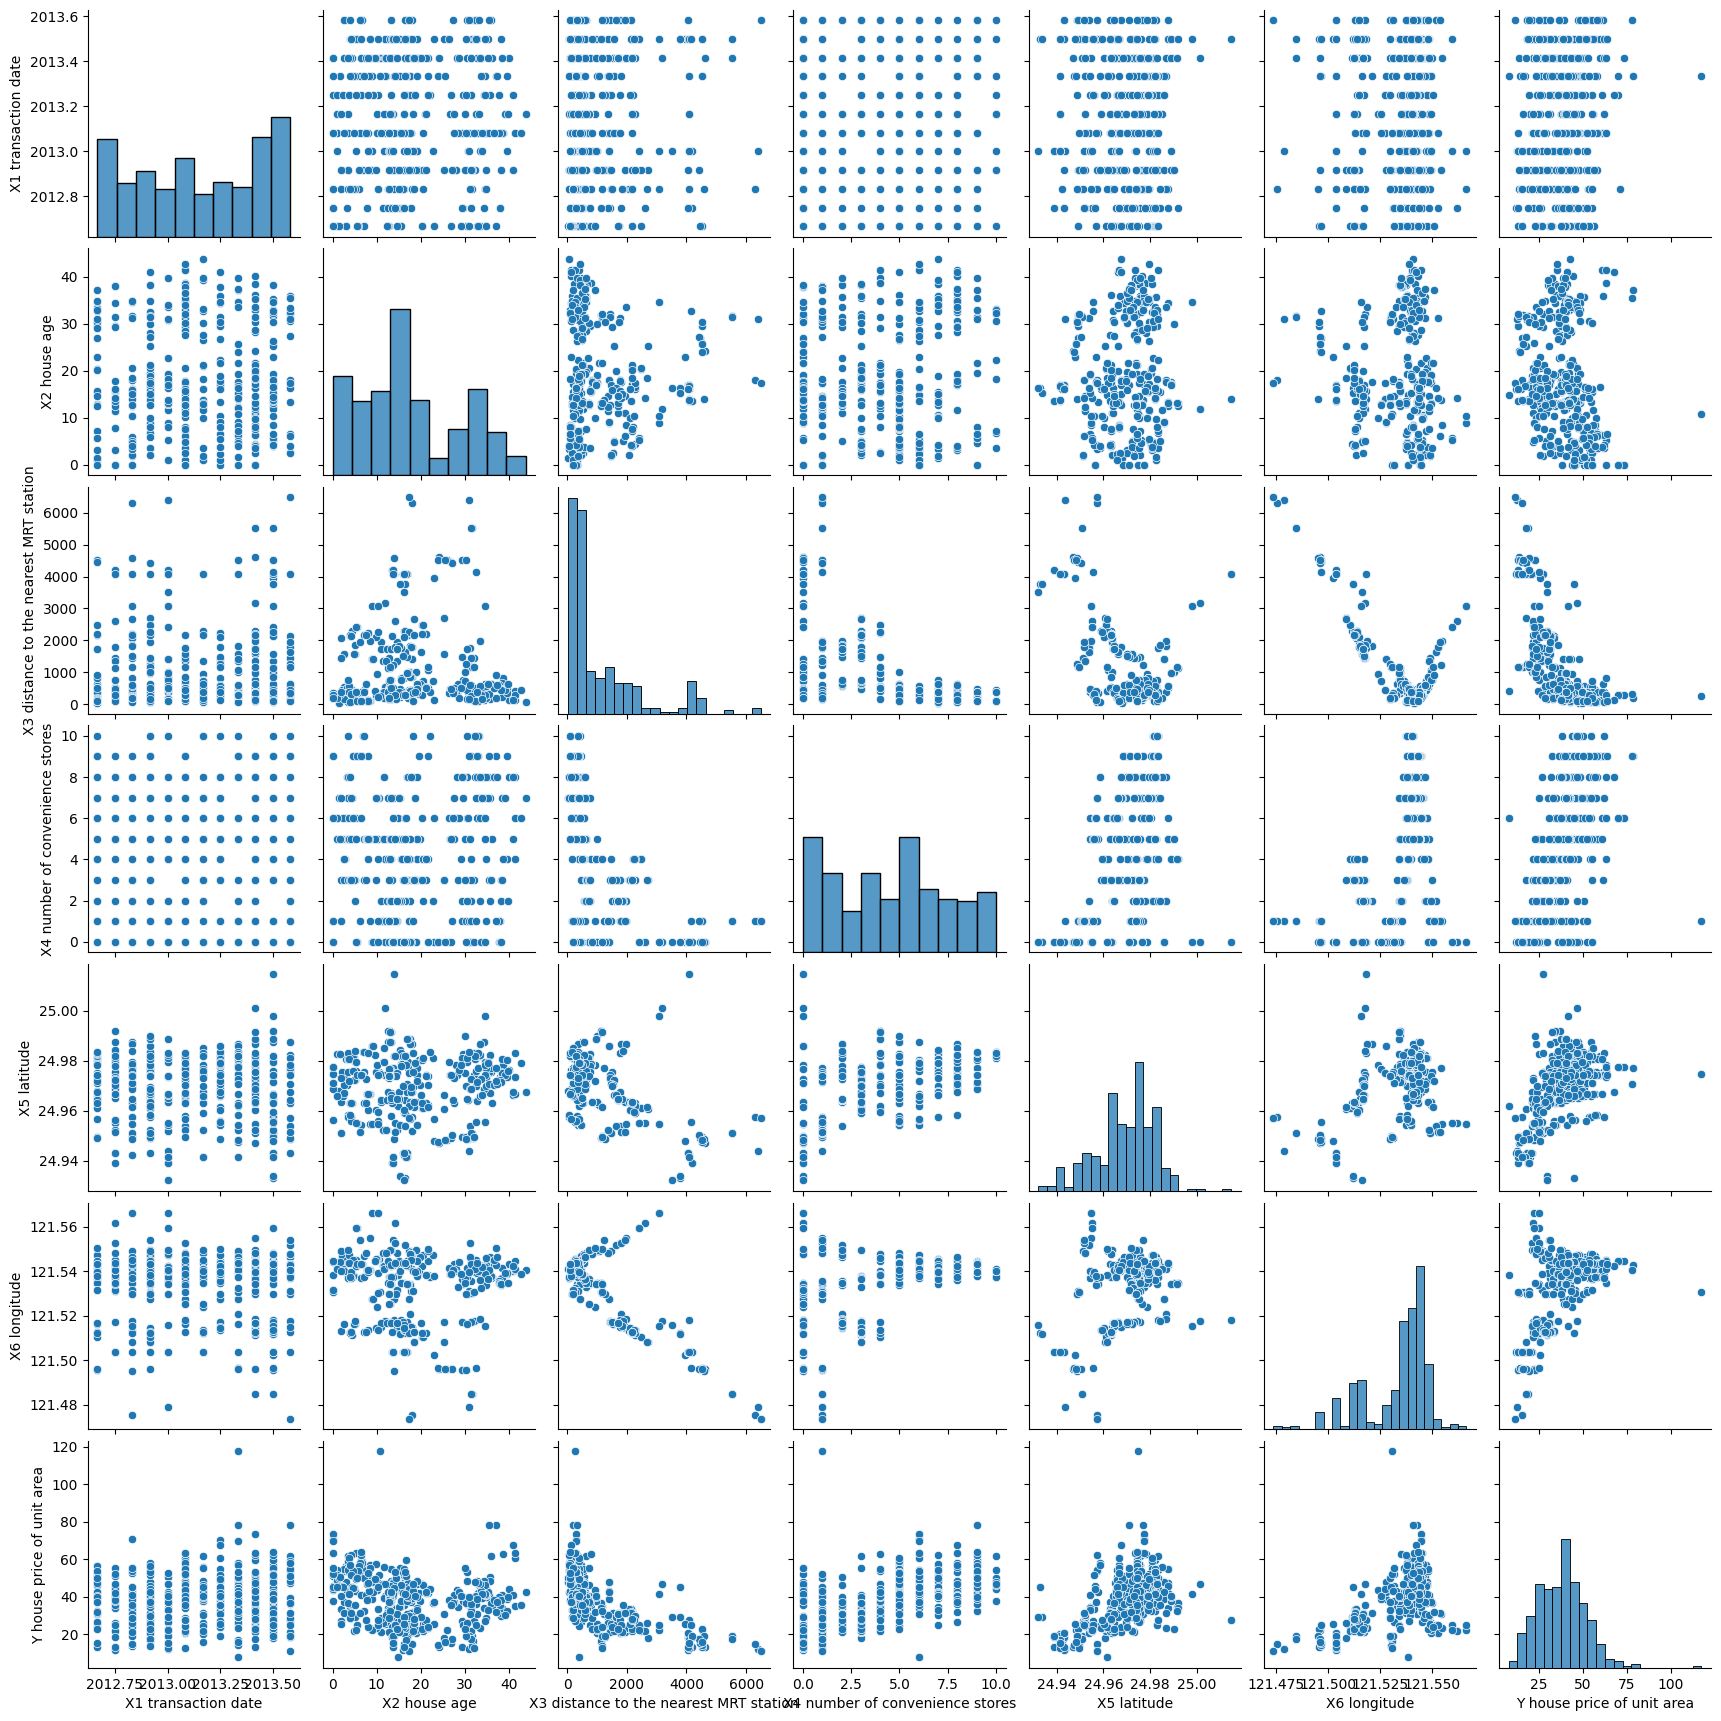

In [10]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

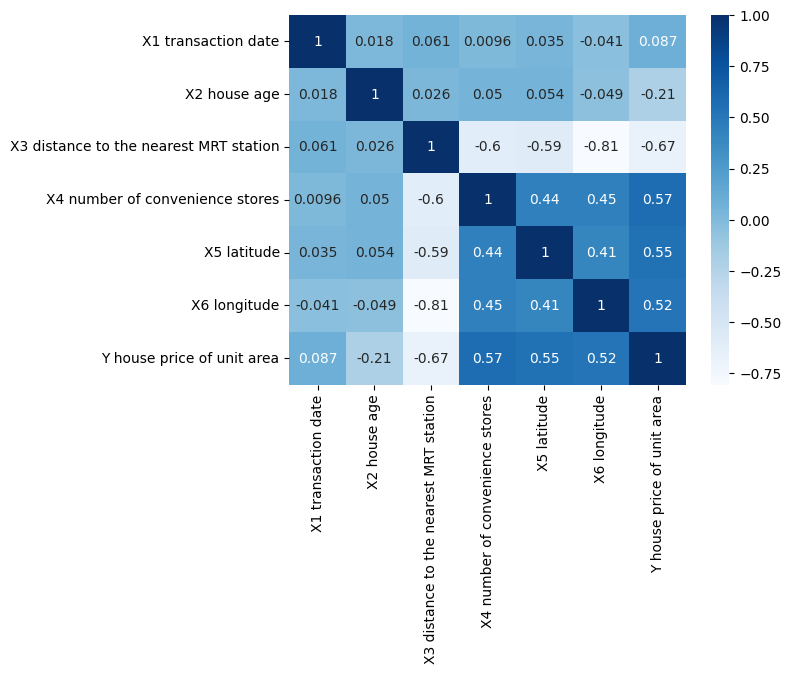

In [11]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

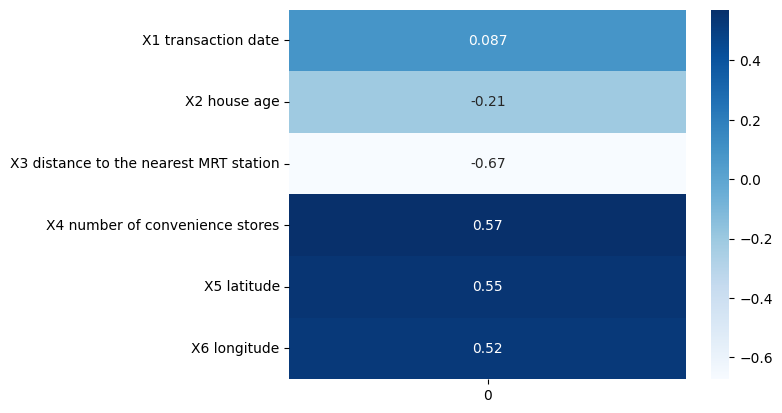

In [13]:
corrw = data.drop(['Y house price of unit area'], axis=1).corrwith(data['Y house price of unit area'])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

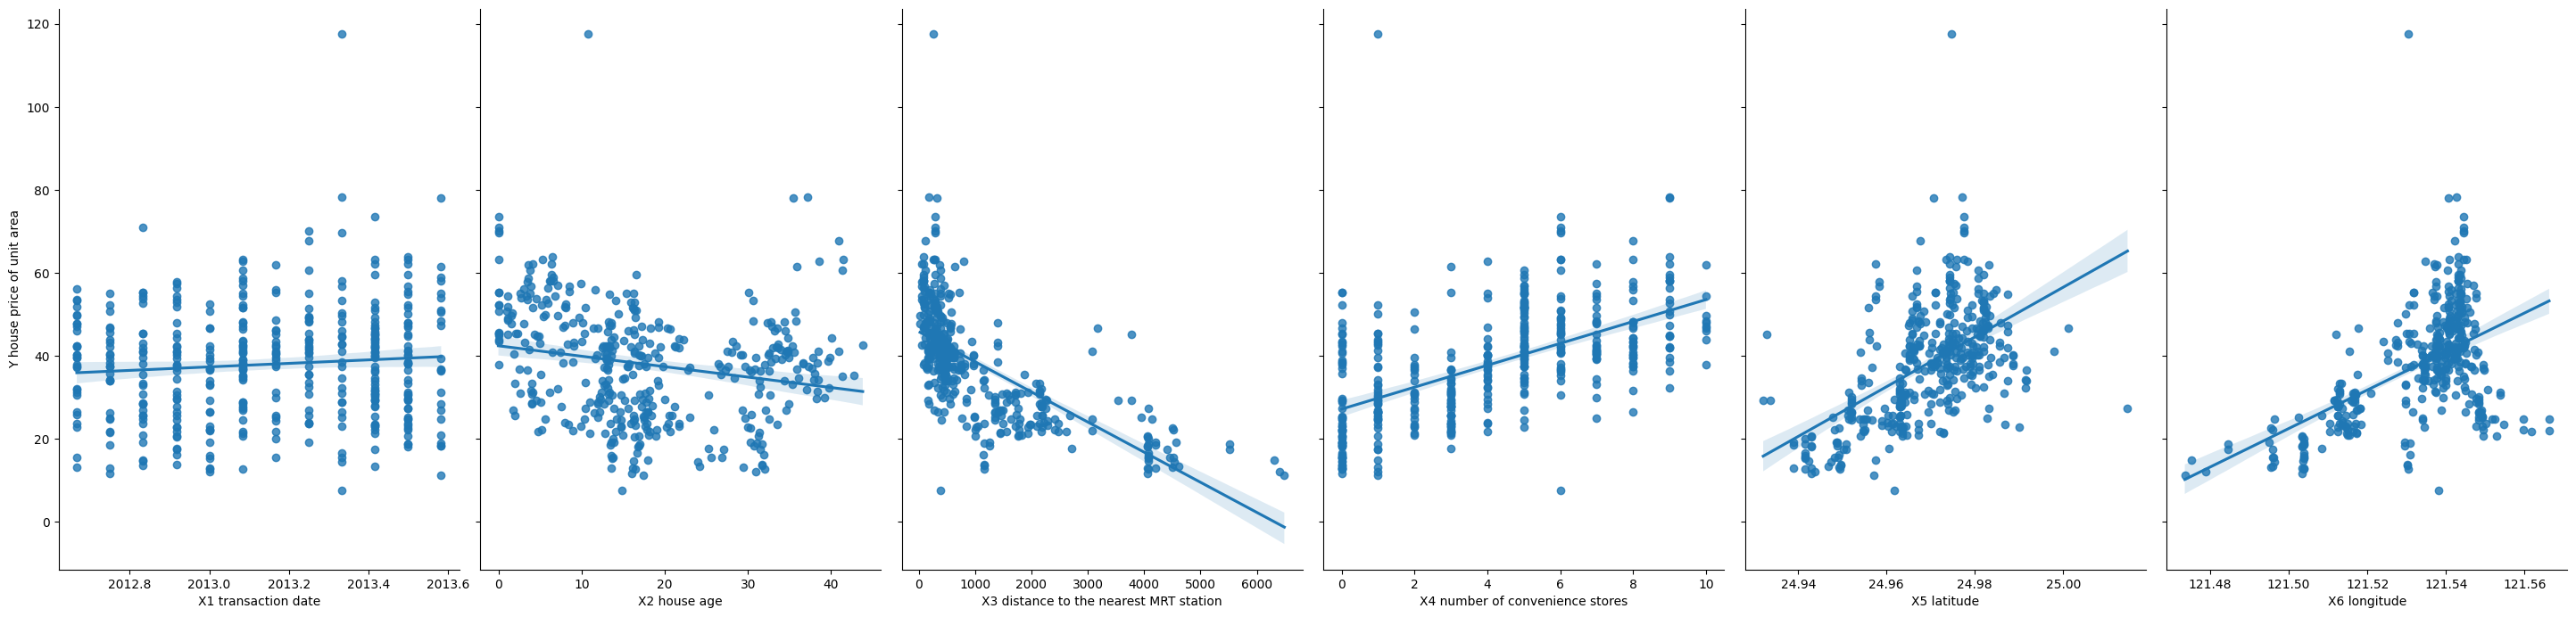

In [17]:
sns.pairplot(data, x_vars=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

## Modelo de regresión

In [18]:
# nombres de características
features = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']

# dataframe de características
X = data[features]

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [19]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

### División entre entrenamiento y prueba

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X.head()
X_train.head()

(310, 6)
(310,)
(104, 6)
(104,)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
369,2013.417,18.2,350.8515,1,24.97544,121.53119
219,2013.417,13.6,492.2313,5,24.96515,121.53737
128,2013.250,3.8,383.8624,5,24.98085,121.54391
352,2012.833,4.0,2180.2450,3,24.96324,121.51241
174,2013.083,41.3,401.8807,4,24.98326,121.54460


In [25]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-10933.705042794249
[ 5.12716033e+00 -2.38906817e-01 -4.89091409e-03  1.07091110e+00
  2.16896254e+02 -3.91701502e+01]


In [27]:
list(zip(features, linreg.coef_))

[('X1 transaction date', np.float64(5.127160332786552)),
 ('X2 house age', np.float64(-0.2389068172904157)),
 ('X3 distance to the nearest MRT station', np.float64(-0.004890914094481724)),
 ('X4 number of convenience stores', np.float64(1.0709110959322472)),
 ('X5 latitude', np.float64(216.89625373762337)),
 ('X6 longitude', np.float64(-39.170150221581785))]

### Predicciónes usando datos de prueba

In [28]:
y_pred = linreg.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [31]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.572520450523227
MSE:  53.73081031695594
RMSE:  7.3301303069560735


### Validación Cruzada

In [34]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [35]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [37]:
# RMSE promedio a través de todos los grupos
print(mse_scores.mean())
print(rmse_scores.mean())

78.33423177467724
8.693434260346574


### Pruebas estadísticas

In [38]:
import statsmodels.api as sm

features = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']

X = data[features]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

KeyError: "None of [Index(['TV', 'Radio', 'Newspaper'], dtype='object')] are in the [columns]"